In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cervicalCancer = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1DE842A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002A1E052A9B0>]], dtype=object)

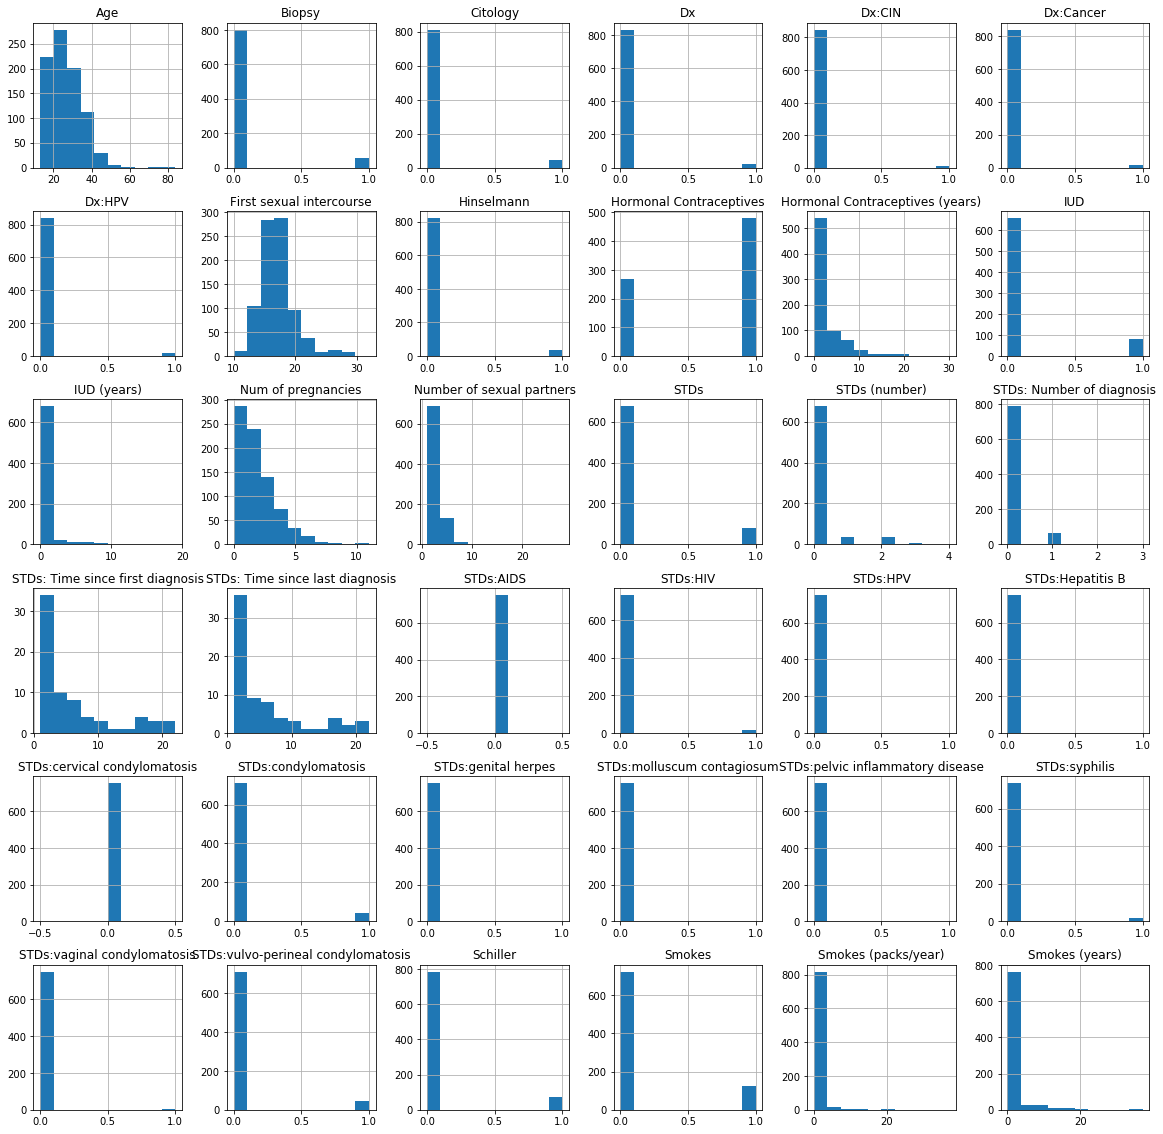

In [5]:
cervicalCancer.hist(figsize=(20,20))

In [6]:
cervicalCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [7]:
from IPython.display import display

display(cervicalCancer)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.00,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.00,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.40,0.0,0.00,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.00,1.0,2.00,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.80,0.0,0.00,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [11]:
cervicalCancer.fillna(method='pad',inplace=True)
cervicalCancer.fillna(method='bfill',inplace=True)

In [12]:
cervicalCancer.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1DE444FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002A1E22A47F0>]], dtype=object)

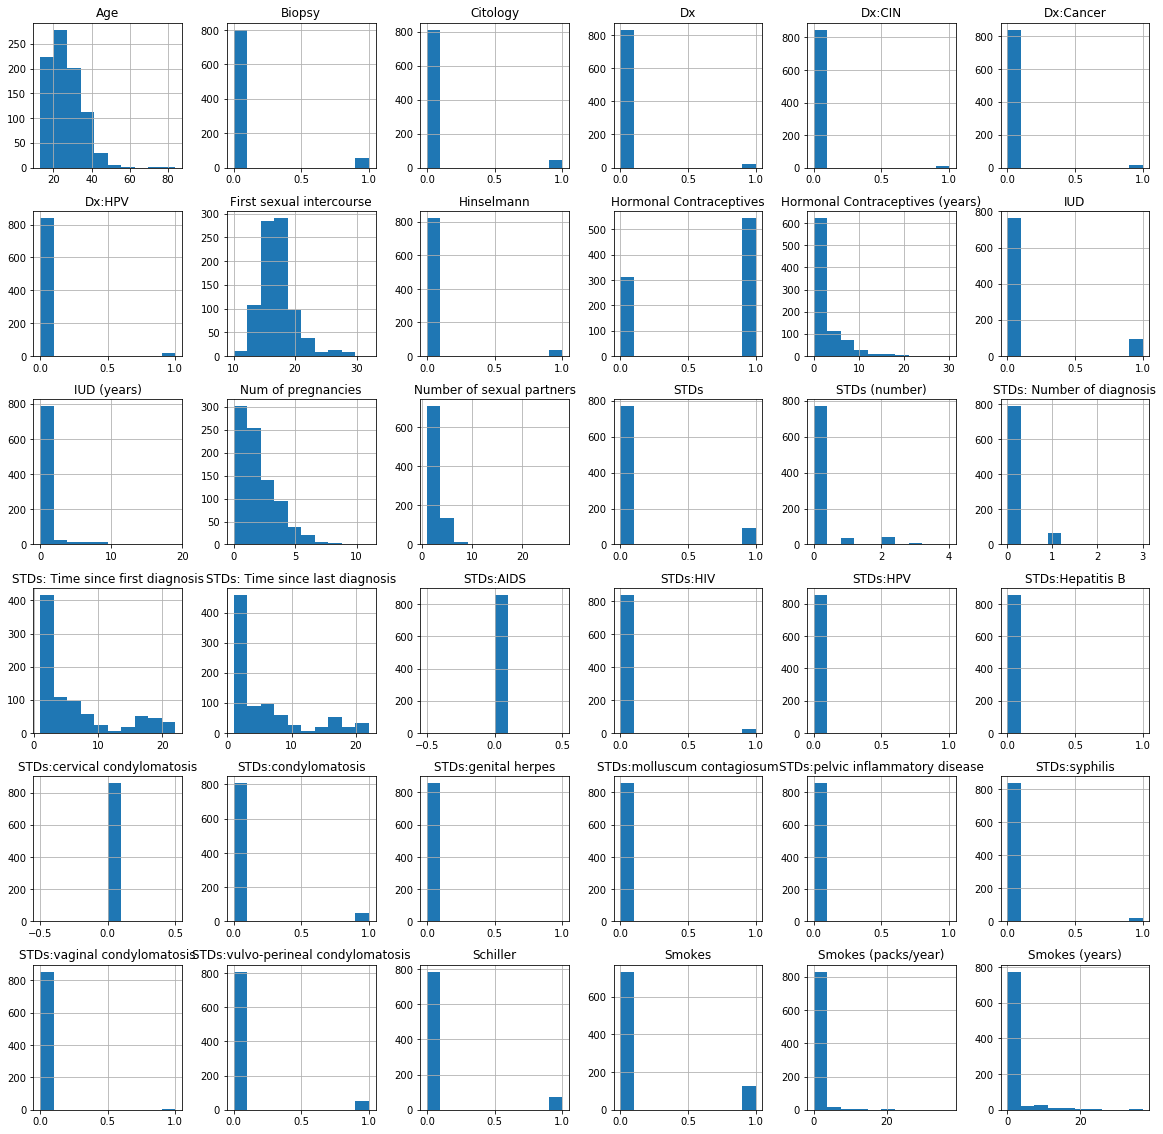

In [15]:
cervicalCancer.hist(figsize=(20,20))

In [16]:
X=cervicalCancer.drop('Biopsy',axis=1)
y=cervicalCancer['Biopsy']
print(X.shape)
print(y.shape)

(858, 35)
(858,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
datasets=[X_train, X_test, y_train, y_test]
for i in datasets:
    print(i.shape)

(600, 35)
(258, 35)
(600,)
(258,)


In [18]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
print("Training set score: {:.3f}".format(svc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svc.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.930


In [19]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier().fit(X_train, y_train)
print("Training set score: {:.3f}".format(adaboost.score(X_train, y_train)))
print("Test set score: {:.3f}".format(adaboost.score(X_test, y_test)))

Training set score: 0.990
Test set score: 0.942


In [20]:
from sklearn.naive_bayes import GaussianNB
GaussianNB = GaussianNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(GaussianNB.score(X_train, y_train)))
print("Test set score: {:.3f}".format(GaussianNB.score(X_test, y_test)))

Training set score: 0.098
Test set score: 0.124


In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier().fit(X_train, y_train)
print("Training set score: {:.3f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test, y_test)))

Training set score: 0.982
Test set score: 0.942
